<a href="https://colab.research.google.com/github/No1377/-/blob/main/%D9%86%D9%85%D9%88%D8%AF%D8%A7%D8%B1_%D8%AD%D9%82_%D8%A8%DB%8C%D9%85%D9%87_%D8%A8%D8%A7_%D8%AA%D9%88%D8%A7%D8%A8%D8%B9_%D8%A7%D9%86%D8%AD%D8%B1%D8%A7%D9%81_%D8%AA%D9%88%D8%A7%D9%86%DB%8C_%D9%88_%D8%AA%D9%88%D8%A7%D9%86%DB%8C_%D8%AF%D9%88%DA%AF%D8%A7%D9%86%D9%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# فراخوانی کتابخانه های لازم
import pandas as pd
import math
import io
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# تعریف نرخ تنزیل
def d(i,k):
  return (1/(1+i)) ** k

In [ ]:
# نرخ بهره
i=0.1

In [ ]:
# فراخوانی جدول مرگ و میر در ایران
from google.colab import drive
df2=pd.read_excel("/content/drive/MyDrive/جدول مرگ و میر ایران.xlsx")
print(df2)

      سن       p_x       q_x
0      0  0.982660  0.017340
1      1  0.998758  0.001242
2      2  0.999063  0.000937
3      3  0.999205  0.000795
4      4  0.999275  0.000725
..   ...       ...       ...
102  102  0.486800  0.513200
103  103  0.459500  0.540500
104  104  0.411800  0.588200
105  105  0.285700  0.714300
106  106  0.000000  1.000000

[107 rows x 3 columns]


In [ ]:
# تعریف فرمول 1-7-2
def p(x,k):
    t=1
    for i in range(0,k):
        t*=df2["p_x"][x+i]
    return t

In [ ]:
# تعریف فرمول 1-3-4
def p_star(x,k,landa):
  return float(norm.cdf(norm.ppf(p(x,k))- landa))

In [ ]:
# تعریف احتمال فوت
def q(x,k):
    return(1-p(x,k))

In [ ]:
# تعریف احتمال فوت مدل وانگ
def q_star(x,k,landa):
  return(1-p_star(x,k,landa))

In [ ]:
# تعریف لیست
A=[]
B=[]

In [ ]:
# انجام محاسبات برای لانداهای مختلف و اضافه کردن لاندا به لیست اول و اضافه کردن حق بیمه به لیست دوم
for landa in np.arange(-5,15,0.01):
    A.append(landa)
    t=0
    z=0
    for k in range(0,20):
      t+= d(i,k+1) * p_star(45,k,landa) * q_star(45+k,1,landa)
    z+= d(i,20) * p_star(45,20,landa)
    Ax_star=t
    Bx_star=z


    r=0
    for k in range(0,20):
      r+= d(i,k) * p_star(45,k,landa)
    ax_star=r

    pi1_star=Ax_star/ax_star

    pi2_star=Bx_star/ax_star

    A_star=pi1_star * 200000000
    B_star=pi2_star * 350000000
    C_star=A_star + B_star
    B.append(C_star)

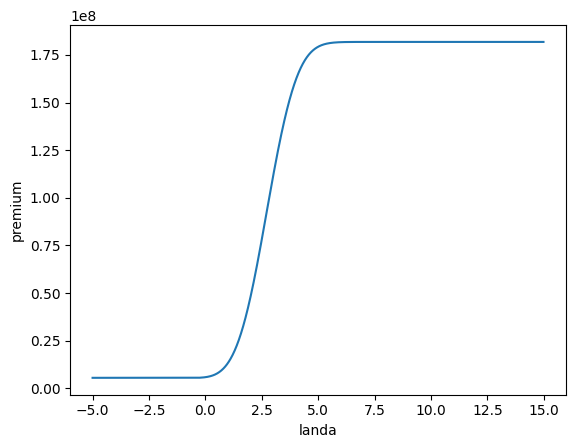

In [ ]:
# رسم نمدوار نتایج فوق
plt.plot(A,B,label="حق بیمه وانگ ")
plt.xlabel("landa")
plt.ylabel("premium")
plt.savefig("chart.png")
plt.show()
#files.download("chart.png")

In [ ]:
print(B)
print(len(B))


[5555335.152719985, 5555335.152578675, 5555335.152428457, 5555335.1522687785, 5555335.152099067, 5555335.151918703, 5555335.151727043, 5555335.151523398, 5555335.151307044, 5555335.151077204, 5555335.150833064, 5555335.150573765, 5555335.150298387, 5555335.150005968, 5555335.1496954905, 5555335.149365853, 5555335.149015928, 5555335.148644498, 5555335.148250278, 5555335.147831908, 5555335.147387967, 5555335.1469169315, 5555335.1464172, 5555335.145887078, 5555335.14532477, 5555335.144728385, 5555335.144095928, 5555335.143425277, 5555335.142714196, 5555335.141960336, 5555335.141161194, 5555335.140314138, 5555335.1394163845, 5555335.138464996, 5555335.137456876, 5555335.136388747, 5555335.135257143, 5555335.134058427, 5555335.132788735, 5555335.131444012, 5555335.130019965, 5555335.128512058, 5555335.126915528, 5555335.12522533, 5555335.123436156, 5555335.121542398, 5555335.119538147, 5555335.117417166, 5555335.115172891, 5555335.112798401, 5555335.110286386, 5555335.107629155, 5555335.104

In [ ]:
# جست و جوی اولین اندیسی که در آن حق بیمه ها دیگر ثابت هستند
for i in range(len(B)):
  if float(B[i])==float(B[i+1]):
    print(i)
    break
print(A[i])

1563
10.629999999999667


In [ ]:
#Power

In [ ]:
# تعریف فرمول 1-3-4
def p_star2(x,k,c):
  return float(p(x,k) ** (c))

In [ ]:
p_star2(10,2,0.9)

0.999041109345464

In [ ]:
# تعریف احتمال فوت مدل وانگ
def q_star2(x,k,c):
  return(1-p_star2(x,k,c))

In [ ]:
# تعریف لیست
A=[]
B=[]

In [ ]:
d(0.1,2)

0.8264462809917354

In [ ]:
# انجام محاسبات برای لانداهای مختلف و اضافه کردن لاندا به لیست اول و اضافه کردن حق بیمه به لیست دوم
for c in np.arange(0,1,0.01):
    A.append(c)
    t=0
    z=0
    for k in range(0,20):
      t+= d(i,k+1) * p_star2(45,k,c) * q_star2(45+k,1,c)
    z+= d(i,20) * p_star2(45,20,c)
    Ax_star2=t
    Bx_star2=z


    r=0
    for k in range(0,20):
      r+= d(i,k) * p_star2(45,k,c)
    ax_star2=r

    pi1_star2=Ax_star2/ax_star2

    pi2_star2=Bx_star2/ax_star2

    A_star2=pi1_star2 * 200000000
    B_star2=pi2_star2 * 350000000
    C_star2=A_star2 + B_star2
    B.append(C_star2)

In [ ]:
d(0.1,2)

0.8264462809917354

In [ ]:
print(A)
print(B)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99]
[4.560949873042005e-56, 3.23193242058751, 6.463783150139068, 9.695552190700335, 12.927239544331115, 16.158845213119648, 19.390369199125743, 22.621811504395055, 25.85317213100162, 29.084451081019434, 32.31564835650833, 35.546763959542375, 38.777797892167136, 42.0087

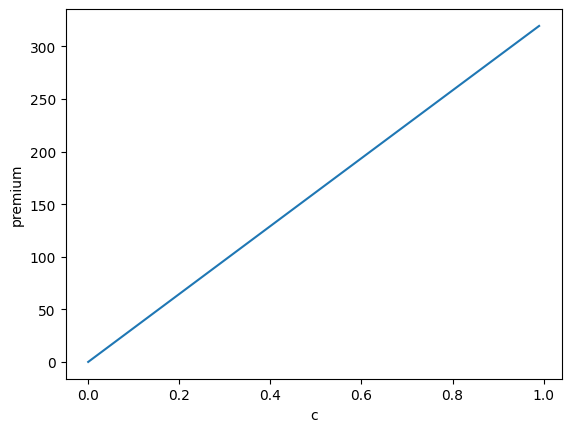

In [ ]:
# رسم نمدوار نتایج فوق
plt.plot(A,B,label="حق بیمه وانگ ")
plt.xlabel("c")
plt.ylabel("premium")
plt.savefig("chart.png")
plt.show()
#files.download("chart.png")